In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir um estilo visual mais limpo e acadêmico para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# --- 1. ESTRUTURAR OS DADOS DO EXPERIMENTO DE APRENDIZADO ATIVO ---
# Estes são os resultados que obtivemos em cada ciclo de treinamento.
data = {
    'Ciclo': ['Modelo v1', 'Modelo v2', 'Modelo v3'],
    # O número de amostras no conjunto de treino para cada ciclo
    'Amostras_Treino': [160, 210, 260],
    'F1_Score': [0.483, 0.638, 0.633]
}
df_results = pd.DataFrame(data)

print("Dados do experimento de Aprendizado Ativo:")
print(df_results)

Dados do experimento de Aprendizado Ativo:
       Ciclo  Amostras_Treino  F1_Score
0  Modelo v1              160     0.483
1  Modelo v2              210     0.638
2  Modelo v3              260     0.633



Gráfico de evolução salvo como 'evolucao_f1_score_active_learning.png'


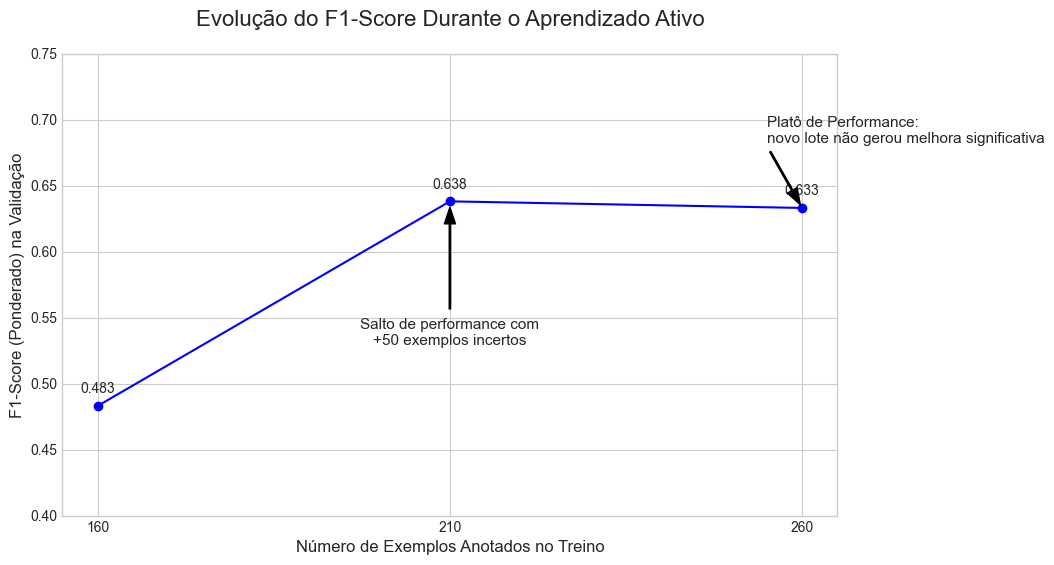

In [4]:
# --- 2. GERAR GRÁFICO 1: EVOLUÇÃO DO F1-SCORE (GRÁFICO DE LINHAS) ---

plt.figure(figsize=(10, 6))
plt.plot(df_results['Amostras_Treino'], df_results['F1_Score'], marker='o', linestyle='-', color='b')

# Adicionar os valores exatos em cada ponto do gráfico
for i, row in df_results.iterrows():
    plt.text(row['Amostras_Treino'], row['F1_Score'] + 0.01, f'{row["F1_Score"]:.3f}', ha='center')

# Adicionar anotações explicativas para contar a história do experimento
plt.annotate(
    'Salto de performance com\n+50 exemplos incertos',
    xy=(210, 0.638),
    xytext=(210, 0.55),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    ha='center',
    va='top',
    fontsize=11
)

plt.annotate(
    'Platô de Performance:\nnovo lote não gerou melhora significativa',
    xy=(260, 0.633),
    xytext=(255, 0.68),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    ha='left',
    va='bottom',
    fontsize=11
)

# Títulos e rótulos dos eixos
plt.title('Evolução do F1-Score Durante o Aprendizado Ativo', fontsize=16, pad=20)
plt.xlabel('Número de Exemplos Anotados no Treino', fontsize=12)
plt.ylabel('F1-Score (Ponderado) na Validação', fontsize=12)
plt.ylim(0.4, 0.75) # Focar na área de variação dos resultados
plt.xticks(df_results['Amostras_Treino']) # Marcar o eixo X com nossos pontos de dados exatos

# Salvar o gráfico em um arquivo de alta resolução para o TCC
plt.savefig('evolucao_f1_score_active_learning.png', dpi=300, bbox_inches='tight')
print("\nGráfico de evolução salvo como 'evolucao_f1_score_active_learning.png'")



/var/folders/k4/x1x0j4qs0svb48fpvhhvkmbh0000gn/T/ipykernel_61876/1500067132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Ciclo', y='F1_Score', data=df_results, palette='viridis')


Gráfico de comparação salvo como 'comparacao_f1_score_ciclos.png'


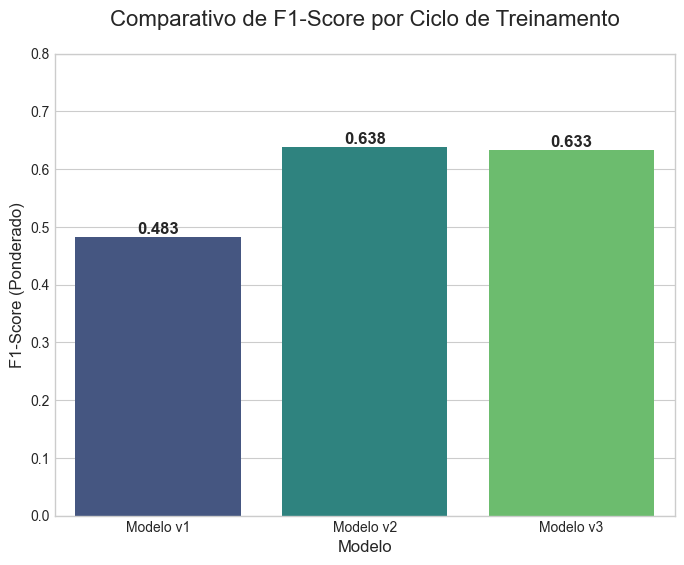

In [5]:
# --- 3. GERAR GRÁFICO 2: COMPARAÇÃO DIRETA (GRÁFICO DE BARRAS) ---

plt.figure(figsize=(8, 6))
bars = sns.barplot(x='Ciclo', y='F1_Score', data=df_results, palette='viridis')

# Adicionar os valores exatos no topo de cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center', fontsize=12, fontweight='bold')

# Títulos e rótulos dos eixos
plt.title('Comparativo de F1-Score por Ciclo de Treinamento', fontsize=16, pad=20)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('F1-Score (Ponderado)', fontsize=12)
plt.ylim(0, 0.8) # Começar o eixo Y do zero para uma comparação visual honesta

# Salvar o gráfico em um arquivo de alta resolução
plt.savefig('comparacao_f1_score_ciclos.png', dpi=300, bbox_inches='tight')
print("Gráfico de comparação salvo como 'comparacao_f1_score_ciclos.png'")

# Exibir os gráficos no notebook
plt.show()